# Lab #2: Probability, Distributions, and Statistical Questions

In [96]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats
from scipy import signal

plt.rcParams["figure.figsize"] = (15,10)

### Problem 1

We are going to imagine that we are looking for gamma-ray sources. In this kind of telescope there is a background of cosmic rays that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma ray source, you need to ask what is the probability that the cosmic ray background would have given you a measurement as signal-like or more than the signal you receive.

To set up this problem, we will assume that the average cosmic ray background in one day is 1, and that the average number of gamma rays emitted by our hypothetical source is 2.

##### A) Show how the probability distribution changes as you sum for more days:



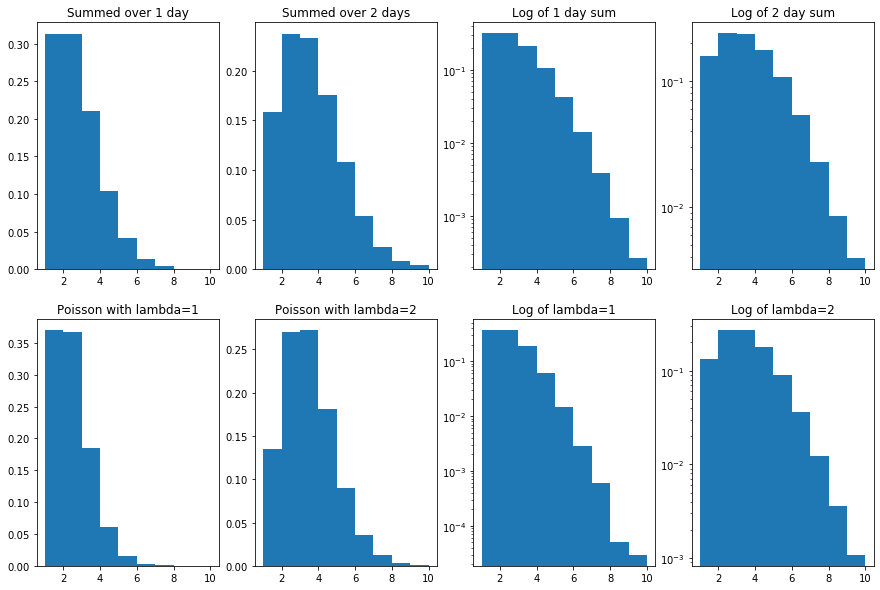

In [170]:
x = np.arange(0,10)
dist = stats.poisson.pmf(x,1)

p2 = scipy.signal.convolve(dist,dist)
x2 = np.arange(0,len(p2))

p3 = scipy.signal.convolve(p2,dist)
x3 = np.arange(0,len(p3))

pois_base = stats.rv_discrete(values=(x,dist)).rvs(size=100000)
pois_k2 = stats.poisson.rvs(1,1, size=100000)
pois_k3 = stats.poisson.rvs(2,1 ,size=100000)
day2 = stats.rv_discrete(values=(x2,p2)).rvs(size=100000)
day3 = stats.rv_discrete(values=(x3,p3)).rvs(size=100000)


fig, ((ax1,ax2,log1,log2), (ax3,ax4,log3,log4)) = plt.subplots(2,4)
# ax1.hist(pois_base, bins=range(1,11), density=True)
# ax1.title.set_text('Base Poisson Distribution')

ax1.title.set_text('Summed over 1 day')
ax1.hist(day2, bins=range(1,11),density=True)

ax2.title.set_text('Summed over 2 days')
ax2.hist(day3, bins=range(1,11),density=True)

ax3.title.set_text('Poisson with lambda=1')
ax3.hist(pois_k2, bins=range(1,11),density=True)

ax4.title.set_text('Poisson with lambda=2')
ax4.hist(pois_k3, bins=range(1,11),density=True)

log1.title.set_text('Log of 1 day sum')
log1.hist(day2, bins=range(1,11),density=True, log=True)

log2.title.set_text('Log of 2 day sum')
log2.hist(day3, bins=range(1,11),density=True, log=True)

log3.title.set_text('Log of lambda=1')
log3.hist(pois_k2, bins=range(1,11),density=True, log=True)

log4.title.set_text('Log of lambda=2')
log4.hist(pois_k3, bins=range(1,11),density=True, log=True)

plt.show()

As we can see, taking the sum over multiple days appears to be identical to increasing the lambda parameter of the poisson distribution. This is made especially obvious when comparing log plots.

##### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

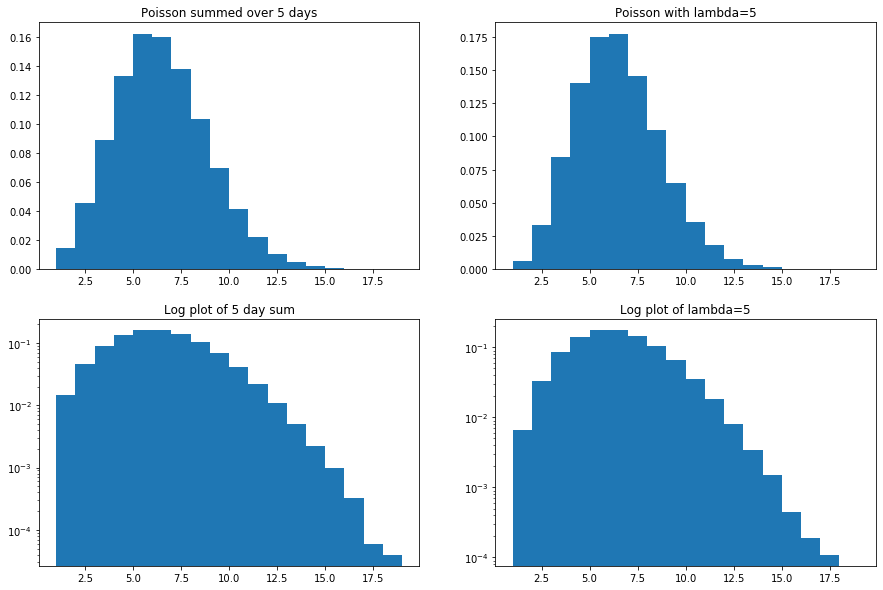

In [169]:
x_init = np.arange(0,10)
dist = stats.poisson.pmf(x_init,1)
p = stats.poisson.pmf(x_init,1)
for days in range(0,5):
    p = scipy.signal.convolve(p,dist)
    x = np.arange(0,len(p))

fig, ((ax1,ax2),(log1,log2)) = plt.subplots(2,2)
day5 = stats.rv_discrete(values=(x,p)).rvs(size=100000)
pois5 = stats.poisson.rvs(5,1 ,size=100000)

ax1.title.set_text('Poisson summed over 5 days')
ax1.hist(day5, bins=range(1,20), density=True)

log1.title.set_text('Log plot of 5 day sum')
log1.hist(day5, bins=range(1,20), density=True, log=True)

ax2.title.set_text('Poisson with lambda=5')
ax2.hist(pois5, bins=range(1,20),density=True)

log2.title.set_text('Log plot of lambda=5')
log2.hist(pois5, bins=range(1,20),density=True, log=True)


plt.show()

Once again, we find that the comparative log plots are nearly identical (and the differences between them can be attributed to natural sampling error), so it seems that the summed probability is indeed still a Poisson distribution.

This also makes sense from a conceptual perspective, because lambda represents the expected rate of occurences. As we extend the time window by convolving over several days, we naturally also increase the number of occurences we expect to see within that time window.

##### C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the Central Limit Theorem.



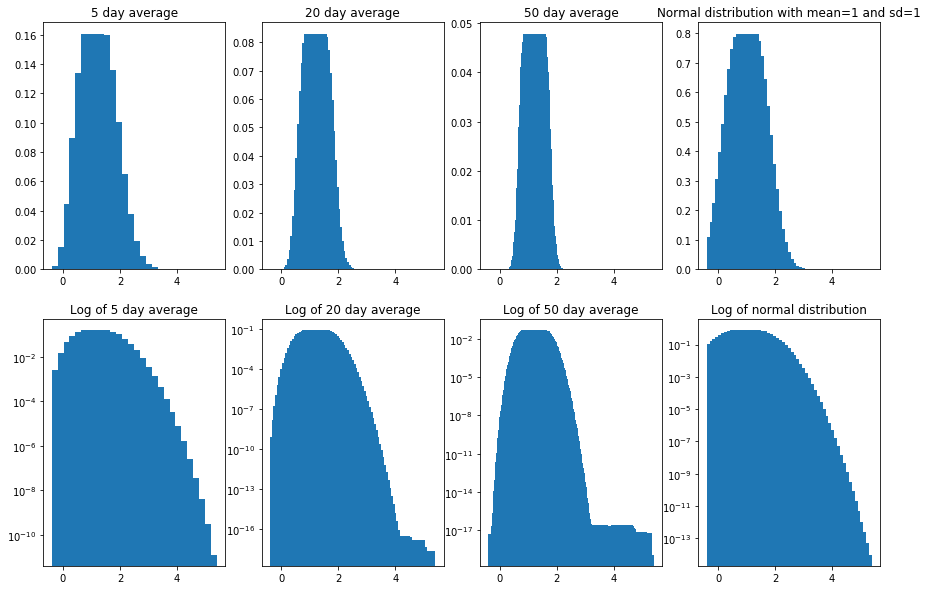

In [184]:
x_init = np.arange(0,5)
dist = stats.poisson.pmf(x_init,1)
p = stats.poisson.pmf(x_init,1)

#5 days
for days in range(0,5):
    p = scipy.signal.fftconvolve(p,dist)
p5 = p
#20 days
for days in range(0,15):
    p = scipy.signal.fftconvolve(p,dist)
p20 = p
#50 days
for days in range(0,30):
    p = scipy.signal.fftconvolve(p,dist)
p50 = p

x5 = np.linspace(0,5, len(p5))
x20 = np.linspace(0,5, len(p20))
x50 = np.linspace(0,5, len(p50))

xn = np.linspace(0,5,50)
pn = stats.norm.pdf(xn, loc=1,scale=1/2)

fig, ((d1,d3,d4, n),(log1,log3,log4, logn)) = plt.subplots(2,4)

d1.title.set_text("5 day average")
d1.bar(x5, p5)

d3.title.set_text("20 day average")
d3.bar(x20, p20)

d4.title.set_text("50 day average")
d4.bar(x50, p50)

log1.title.set_text("Log of 5 day average")
log1.bar(x5, p5, log=True)

log3.title.set_text("Log of 20 day average")
log3.bar(x20, p20, log=True)

log4.title.set_text("Log of 50 day average")
log4.bar(x50, p50, log=True)



n.title.set_text("Normal distribution with mean=1 and sd=1/2")
n.bar(xn,pn)

logn.title.set_text("Log of normal distribution")
logn.bar(xn,pn,log=True)
plt.show()

We found that the larger the number of days we averaged, the closer we got to a normal distribution with a mean of 1. This makes sense - the Central Limit Theorem states that the average of any average of a random variable will always converge to a gaussian distribution. Because lambda represents the average number of events in a given unit of time (in this case, one day), and our distribution had an expected value of 1 even per day, we would expect that the average outcome of many days to be normally distributed about 1.

##### D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

Let's let N = 5. Then assume we saw 10 total gamma rays from our source (so $k = 10$). To find the sigma of our observation, we must find the likelihood that this same observation could be created through background noise. Therefore, as we saw in parts B and C, we will compare our observation to a poisson distribution with $\lambda = N*X = 5.$

In [215]:
prob = np.round(stats.poisson.cdf(10, 5),3)
sigma = stats.poisson.ppf(prob, 5)

print("Sigma of our source observation: " , sigma)

Sigma of our source observation:  10.0


### Problem 2: Pick a skewed continuous distribution that describes your background over some observing interval.

We will choose to use the Rayleigh distribution, which has the following pdf and cdf

$$pdf(x;\sigma)=\frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}}$$

$$cdf(x;\sigma) = 1-e^{\frac{-x^2}{2\sigma^2}}$$

##### A) Show how the distribution changes as you average over more observing intervals.

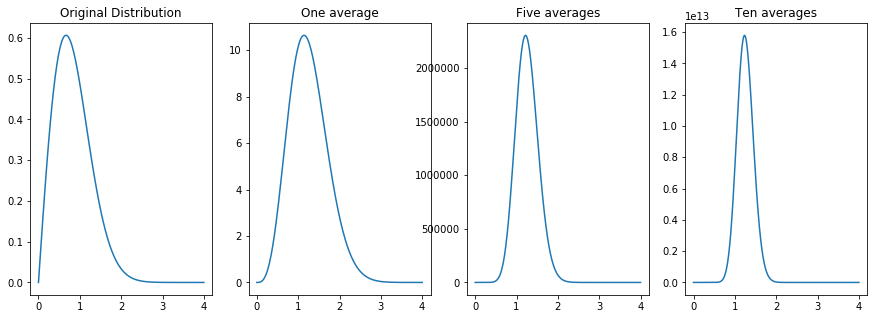

In [242]:
x = np.linspace(0,4,100)
p1 = stats.rayleigh.pdf(x)
p = p1

p2 = scipy.signal.fftconvolve(p,p)
x2 = np.linspace(0,4,len(p2))
for i in range(0,5):
    p = scipy.signal.fftconvolve(p,p1)
p5 = p
x5 = np.linspace(0,4,len(p5))
for i in range(0,5):
    p = scipy.signal.fftconvolve(p,p1)
p10 = p
x10 = np.linspace(0,4,len(p10))

plt.rcParams["figure.figsize"] = (15,5)
fig, (plt1, plt2,plt3,plt4) = plt.subplots(1,4)
plt1.title.set_text("Original Distribution")
plt1.plot(x,dist)

plt2.title.set_text("One average")
plt2.plot(x2,p2)

plt3.title.set_text("Five averages")
plt3.plot(x5,p5)

plt4.title.set_text("Ten averages")
plt4.plot(x10,p10)
plt.show()

##### B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

As we can see, the original shape of the distribution begins to change almost immediately, and within five averagings already looks like a Gaussian distribution.

### Problem 3: 
We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

#### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

##### A) 

From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In [290]:
x = 3
y = 13.232

print("We choose X (the width of our distribution) to be " , x)
print("We choose Y (the strength of the signal we receive) to be ", y)
p = stats.norm.cdf(y, loc=0, scale = x)
sigma = np.round(stats.norm.ppf(p),3)
print("We found that our detection had a signifcance of ", sigma, " sigma.")

if(sigma < 5):
    print("This is less than 5 sigma, therefore we cannot claim a discovery.")
else:
    print("As this is more than 5 sigma, we can claim a discovery!")

We choose X (the width of our distribution) to be  3
We choose Y (the strength of the signal we receive) to be  13.232
We found that our detection had a signifcance of  4.411  sigma.
This is less than 5 sigma, therefore we cannot claim a discovery.


##### B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

We assume that our background has a gaussian distribution with mean = 0 and sd = 3. If this is the case, what is the significance of a CCD detection signal strength of 6.232 from 10,000 observations?

$$10000*\int_{13.232}^\inf \frac{1}{3\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x}{3})^2}dx$$

This equation gives us the expected number of events with an intensity of 13.232 or greater in 10,000 measurements.

##### C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [294]:
p10 = 10000*(1-p)
sigma10 = stats.norm.ppf(1-p10)
print('Number of expected measurements of intensity of', y , ' or greater is', np.round(p10,3))
print('Sigma of a measurement of ' , y , 'from 10000 trials:',np.round(sigma10,3))

Number of expected measurements of intensity of 13.232  or greater is 0.052
Sigma of a measurement of  13.232 from 10000 trials: 1.63
